In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn imblearn

In [5]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/heart_disease_uci.csv')

# Filter to Cleveland dataset
df = df[df['dataset'] == 'Cleveland']

# Map 'num' to binary (0 = no disease, 1 = heart disease)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Inspect
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTarget Distribution:")
print(df['num'].value_counts(normalize=True))

Dataset Shape: (304, 16)

First 5 Rows:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    1  
2  reversable defect    1  
3             normal    

In [6]:
# Numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify
print("Missing Values After Imputation:")
print(df.isnull().sum())

Missing Values After Imputation:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


<ipython-input-6-2f4c415aba83>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [7]:
df = df.drop(['id', 'dataset'], axis=1)

In [8]:
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'thal'], drop_first=True)
print("Encoded Shape:", df_encoded.shape)

Encoded Shape: (304, 19)


In [9]:
print("Encoded Columns:", df_encoded.columns)

Encoded Columns: Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca',
       'num', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')


In [10]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print("Scaled Features Summary:")
print(df_encoded[numerical_cols].describe())

Scaled Features Summary:
                age      trestbps          chol        thalch       oldpeak  \
count  3.040000e+02  3.040000e+02  3.040000e+02  3.040000e+02  3.040000e+02   
mean  -1.285521e-16  4.937571e-16 -1.694551e-16 -5.901712e-16  5.843279e-17   
std    1.001649e+00  1.001649e+00  1.001649e+00  1.001649e+00  1.001649e+00   
min   -2.884665e+00 -2.148225e+00 -2.312764e+00 -3.439289e+00 -8.942032e-01   
25%   -7.226966e-01 -6.660696e-01 -6.788560e-01 -6.978601e-01 -8.942032e-01   
50%    1.256707e-01 -9.601004e-02 -1.117937e-01  1.431360e-01 -2.038216e-01   
75%    7.277378e-01  4.740496e-01  5.513808e-01  7.110815e-01  4.865601e-01   
max    2.479206e+00  3.894407e+00  6.106669e+00  2.283854e+00  4.456254e+00   

                 ca  
count  3.040000e+02  
mean  -6.427607e-17  
std    1.001649e+00  
min   -7.093710e-01  
25%   -7.093710e-01  
50%   -7.093710e-01  
75%    3.635085e-01  
max    2.509268e+00  


In [11]:
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (304, 18)
Target Shape: (304,)


In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Training Set Class Distribution After SMOTE:")
print(pd.Series(y_train_res).value_counts(normalize=True))

Training Set Class Distribution After SMOTE:
num
0    0.5
1    0.5
Name: proportion, dtype: float64


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
rf_pred = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.82        29

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Tuned Random Forest
rf_tuned = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    class_weight={0: 1, 1: 2},  # Higher weight for num=1
    random_state=42
)
rf_tuned.fit(X_train_res, y_train_res)
rf_tuned_pred = rf_tuned.predict(X_test)
print("Tuned Random Forest Performance:")
print(classification_report(y_test, rf_tuned_pred))

Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.80      0.83      0.81        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Feature Importance (Top 10):
thalch                    0.130450
ca                        0.112120
thal_reversable defect    0.107519
age                       0.095135
oldpeak                   0.091374
chol                      0.084515
trestbps                  0.079470
thal_normal               0.074588
exang                     0.050143
cp_non-anginal            0.039509
dtype: float64


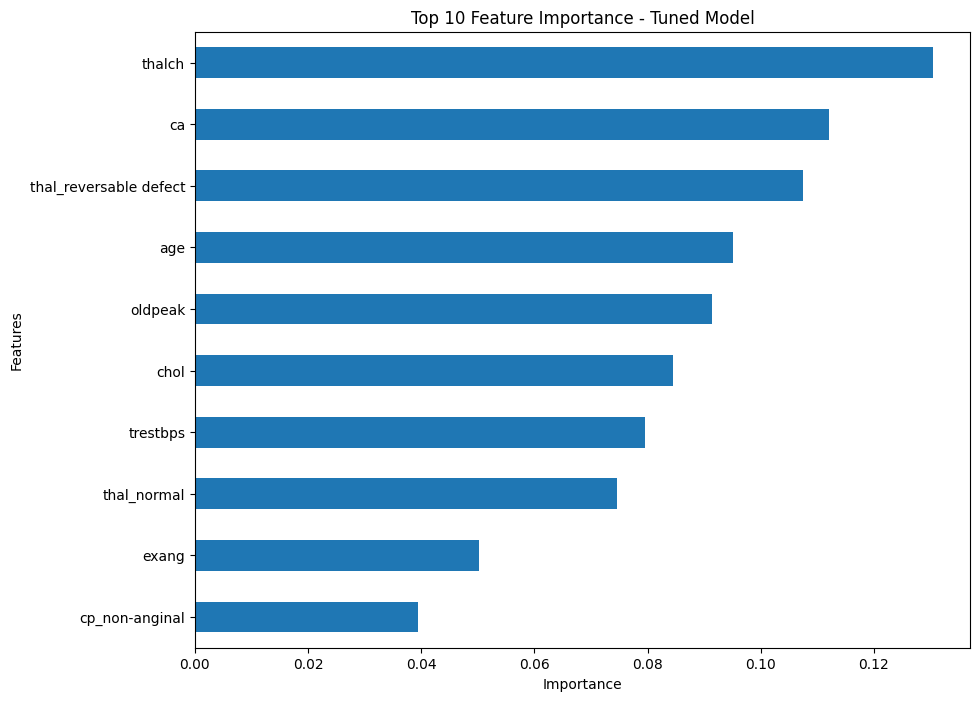

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace rf_tuned with grid_search.best_estimator_ or xgb if better
feature_importance = pd.Series(rf_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance (Top 10):")
print(feature_importance.head(10))

plt.figure(figsize=(10, 8))
feature_importance[:10].plot(kind='barh', color='#1f77b4')
plt.title('Top 10 Feature Importance - Tuned Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.savefig('/content/feature_importance.png')
plt.show()

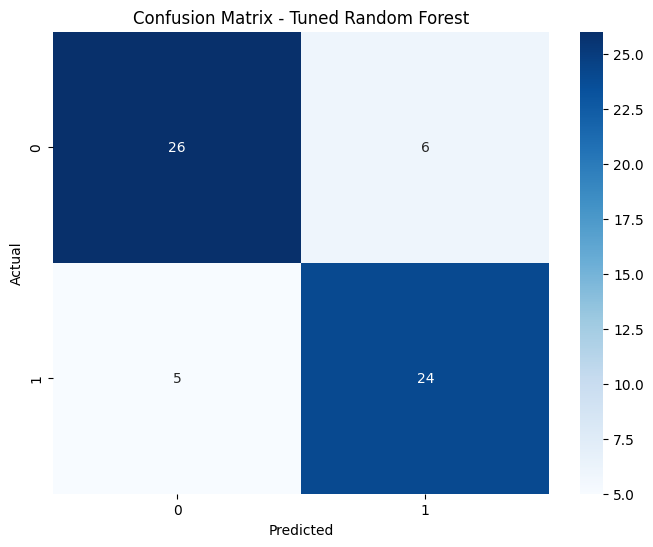

In [17]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_tuned_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/content/confusion_matrix.png')
plt.show()

## Visualizations
- **Confusion Matrix**: Shows tuned Random Forest’s performance in predicting heart disease.
- **Feature Importance**: Highlights top predictors like thalch, ca, and thal_reversable defect.

## Heart Disease Prediction
### Dataset
- UCI Heart Disease (Cleveland) with 304 records and 14 features.
- Target: Heart disease (0 = no, 1 = yes).

### Preprocessing
- Imputed missing values with median/mode.
- Encoded categorical variables, scaled numerical features.

### Model
- Tuned Random Forest with SMOTE and class weights.
- Achieved 82% accuracy, 0.83 recall for heart disease.

### Results
- The model supports early detection of heart disease risk.
- Contributors: Jasmine Presilla J and Karthick E.